In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import matplotlib.dates as mdate

In [5]:
df1 = yf.download('^GSPC',start='1900-03-01', proxy='127.0.0.1:7890')
df1.drop(columns=['Volume'],inplace=True)
df1['return'] = 100*df1['Adj Close'].pct_change()
df1['log_return'] = 100*(np.log2(df1['Adj Close']) - np.log2(df1['Adj Close'].shift(1)))
df1.dropna(inplace=True)
df1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,return,log_return
Date,,,,,,,
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0.566254,0.814627
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,-0.225230,-0.325305
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,-0.959368,-1.390758
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0.626784,0.901436
1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,-0.906001,-1.313041
...,...,...,...,...,...,...,...
2022-04-08,4494.149902,4520.410156,4474.600098,4488.279785,4488.279785,-0.265103,-0.382970
2022-04-11,4462.640137,4464.350098,4408.379883,4412.529785,4412.529785,-1.687729,-2.455659
2022-04-12,4437.589844,4471.000000,4381.339844,4397.450195,4397.450195,-0.341745,-0.493878


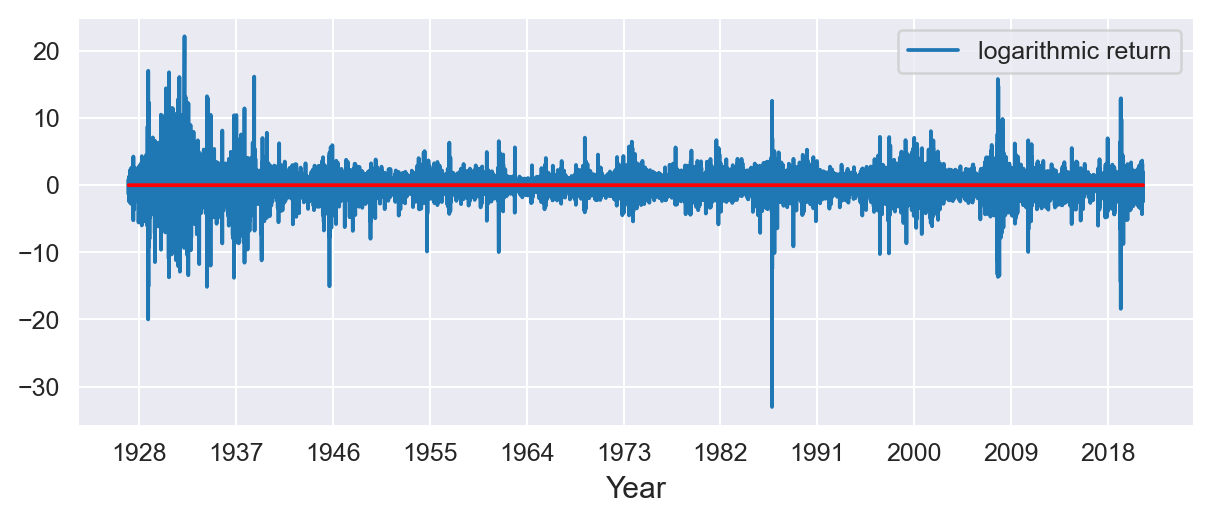

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,3),dpi=180)
plt.plot(df1['log_return'],label='logarithmic return')
plt.plot(df1['return'].index,np.zeros(len(df1['return'])),color='r')
length = int(len(df1.index)/10/252)
plt.xticks(pd.date_range(df1.index[0],df1.index[-1],freq=str(length)+'Y'))
plt.gca().xaxis.set_major_formatter(mdate.DateFormatter('%Y'))
plt.xlabel('Year',{'fontsize':'large'})
# plt.title('S&P 500 index logarithmic return')
plt.legend()
plt.show()

In [35]:
result = adfuller(df1['return'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -22.273948281226858
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.430626767266628
Critial Values:
   5%, -2.861662322439726
Critial Values:
   10%, -2.5668351087124126


In [36]:
def descriptive(df):
    max = np.max(df)
    min = np.min(df)
    mean = np.mean(df)
    std = np.std(df)
    skew = stats.skew(df)
    kurtosis = stats.kurtosis(df)
    print('maximum: {:.2f}%'.format(max*100))
    print('minimum: {:.2f}%'.format(min*100))
    print('mean: {:.3f}%'.format(mean*100))
    print('std. dev.: {:.2f}%'.format(std*100))
    print('skewness: {:.2f}%'.format(skew*100))
    print('kurtosis: {:.2f}'.format(kurtosis))

In [37]:
descriptive(df1['return']/100)

maximum: 16.61%
minimum: -20.47%
mean: 0.031%
std. dev.: 1.20%
skewness: -12.02%
kurtosis: 17.51


In [10]:
df2 = yf.download('^DJI',start='1900-03-01', proxy='127.0.0.1:7890')
df2.drop(columns=['Volume'],inplace=True)
df2['return'] = 100*df2['Adj Close'].pct_change()
df2['log_return'] = 100*(np.log2(df2['Adj Close']) - np.log2(df2['Adj Close'].shift(1)))
df2.dropna(inplace=True)
df2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,return,log_return
Date,,,,,,,
1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,3201.500000,0.917290,1.317337
1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,3200.100098,-0.043726,-0.063098
1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,3204.800049,0.146869,0.211732
1992-01-08,3204.800049,3229.199951,3185.820068,3203.899902,3203.899902,-0.028087,-0.040527
1992-01-09,3203.899902,3228.310059,3192.750000,3209.500000,3209.500000,0.174790,0.251949
...,...,...,...,...,...,...,...
2022-04-08,34569.238281,34908.460938,34470.191406,34721.121094,34721.121094,0.397734,0.572671
2022-04-11,34630.269531,34701.339844,34272.289062,34308.078125,34308.078125,-1.189601,-1.726522
2022-04-12,34412.511719,34669.968750,34102.808594,34220.359375,34220.359375,-0.255680,-0.369340


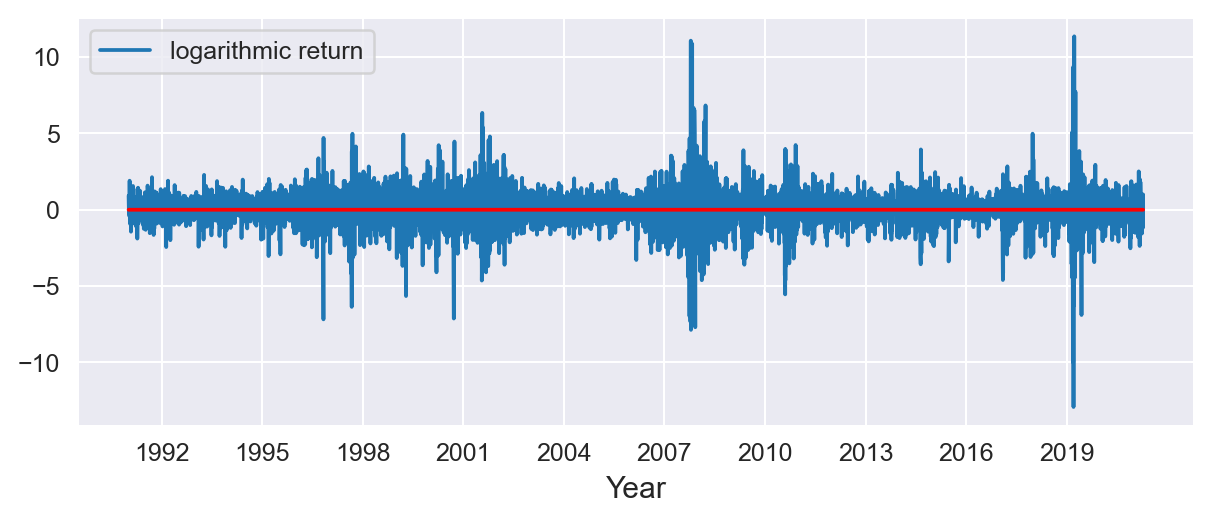

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,3),dpi=180)
plt.plot(df2['return'],label='logarithmic return')
plt.plot(df2['return'].index,np.zeros(len(df2['return'])),color='r')
plt.xlabel('Year',{'fontsize':'large'})
length = int(len(df2.index)/10/252)
plt.xticks(pd.date_range(df2.index[0],df2.index[-1],freq=str(length)+'Y'))
plt.gca().xaxis.set_major_formatter(mdate.DateFormatter('%Y'))
# plt.title('Dow Jones index logarithmic return')
plt.legend()
plt.show()

In [40]:
descriptive(df2['return']/100)

maximum: 11.37%
minimum: -12.93%
mean: 0.037%
std. dev.: 1.11%
skewness: -16.62%
kurtosis: 12.98


In [41]:
result = adfuller(df2['return'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -16.83094018308652
n_lags: 1.15812152528479e-29
p-value: 1.15812152528479e-29
Critial Values:
   1%, -3.431211973022116
Critial Values:
   5%, -2.861920927475029
Critial Values:
   10%, -2.5669727632284878


In [12]:
df3 = yf.download('^IXIC',start='1900-03-01', proxy='127.0.0.1:7890')
df3.drop(columns=['Volume'],inplace=True)
df3['return'] = 100*df3['Adj Close'].pct_change()
df3['log_return'] = 100*(np.log2(df3['Adj Close']) - np.log2(df3['Adj Close'].shift(1)))
df3.dropna(inplace=True)
df3

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,return,log_return
Date,,,,,,,
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0.839996,1.206797
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,-0.079328,-0.114491
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,-0.069472,-0.100261
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0.754786,1.084838
1971-02-12,102.050003,102.050003,102.050003,102.050003,102.050003,0.591430,0.850740
...,...,...,...,...,...,...,...
2022-04-08,13830.469727,13866.059570,13693.690430,13711.000000,13711.000000,-1.340547,-1.947080
2022-04-11,13547.290039,13585.080078,13401.389648,13411.959961,13411.959961,-2.181023,-3.181372
2022-04-12,13584.690430,13685.950195,13317.740234,13371.570312,13371.570312,-0.301147,-0.435118


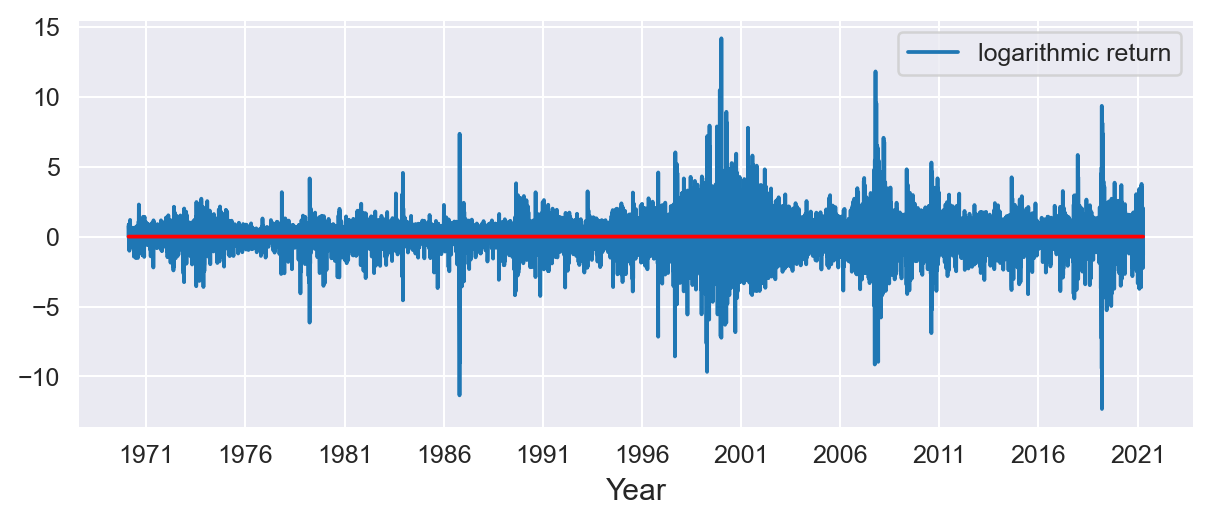

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,3),dpi=180)
plt.plot(df3['return'],label='logarithmic return')
plt.plot(df3['return'].index,np.zeros(len(df3['return'])),color='r')
plt.xlabel('Year',{'fontsize':'large'})
length = int(len(df3.index)/10/252)
plt.xticks(pd.date_range(df3.index[0],df3.index[-1],freq=str(length)+'Y'))
plt.gca().xaxis.set_major_formatter(mdate.DateFormatter('%Y'))
# plt.title('NASDAQ index logarithmic return')
plt.legend()
plt.show()

In [45]:
descriptive(df3['return']/100)

maximum: 14.17%
minimum: -12.32%
mean: 0.046%
std. dev.: 1.25%
skewness: -15.49%
kurtosis: 10.05


In [47]:
result = adfuller(df3['return'])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -17.428575569269704
n_lags: 4.781292795850019e-30
p-value: 4.781292795850019e-30
Critial Values:
   1%, -3.4308584821164088
Critial Values:
   5%, -2.8617647243569277
Critial Values:
   10%, -2.5668896158266574


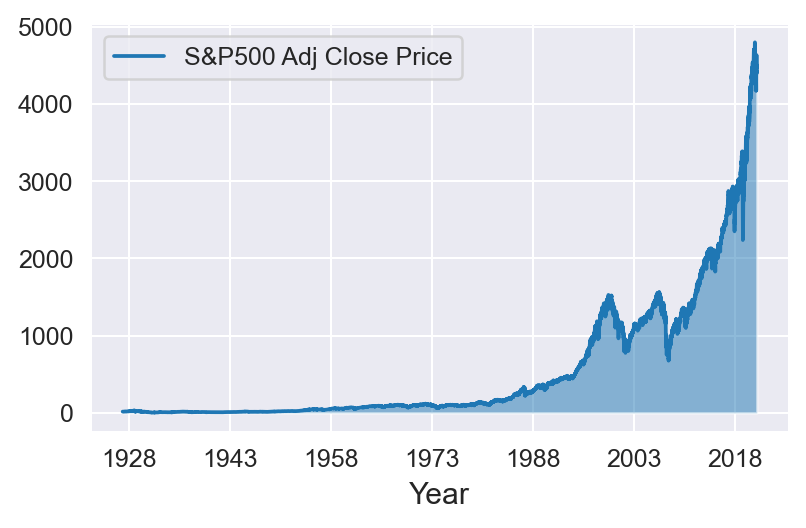

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,3),dpi=180)
plt.plot(df1['Adj Close'],label='S&P500 Adj Close Price')
plt.fill_between(df1.index,df1['Adj Close'],alpha=0.5)
length = int(len(df1.index)/6/252)
plt.xticks(pd.date_range(df1.index[0],df1.index[-1],freq=str(length)+'Y'))
plt.gca().xaxis.set_major_formatter(mdate.DateFormatter('%Y'))
plt.xlabel('Year',{'fontsize':'large'})
# plt.title('NASDAQ index logarithmic return')
plt.legend()
plt.show()

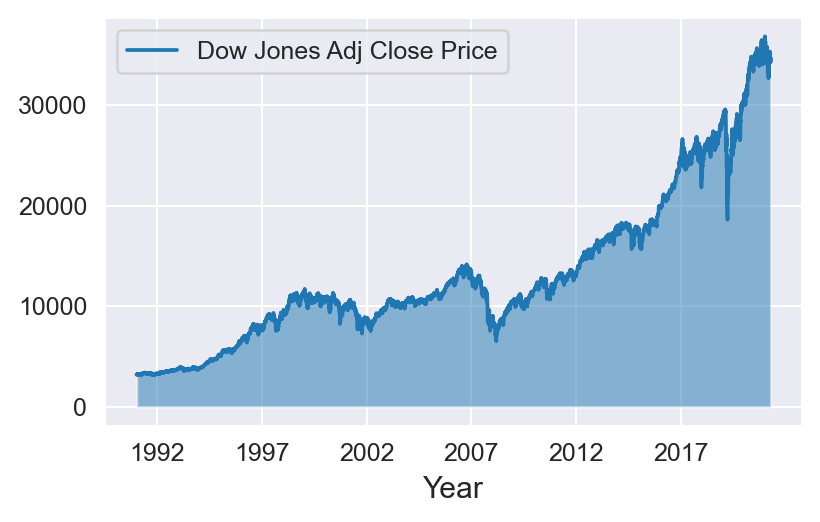

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,3),dpi=180)
plt.plot(df2['Adj Close'],label='Dow Jones Adj Close Price')
plt.xlabel('Year',{'fontsize':'large'})
plt.fill_between(df2.index,df2['Adj Close'],alpha=0.5)
length = int(len(df2.index)/6/252)
plt.xticks(pd.date_range(df2.index[0],df2.index[-1],freq=str(length)+'Y'))
plt.gca().xaxis.set_major_formatter(mdate.DateFormatter('%Y'))
# plt.title('NASDAQ index logarithmic return')
plt.legend()
plt.show()

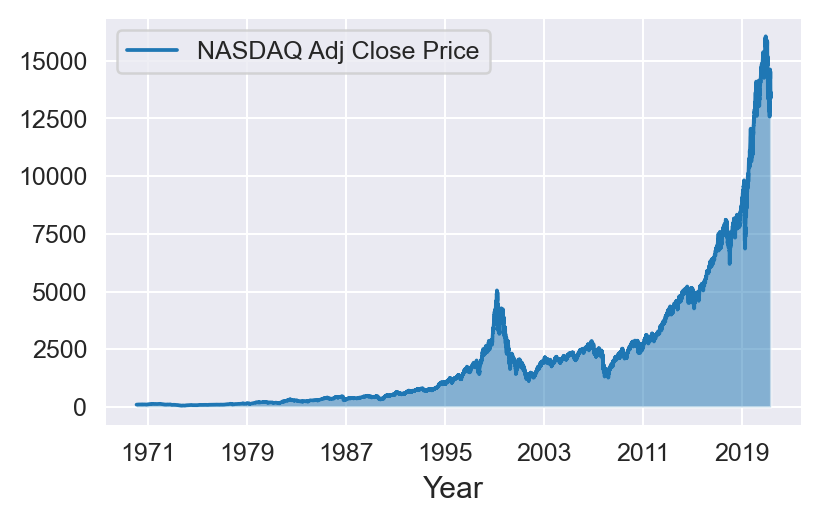

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,3),dpi=180)
plt.plot(df3['Adj Close'],label='NASDAQ Adj Close Price')
plt.xlabel('Year',{'fontsize':'large'})
plt.fill_between(df3.index,df3['Adj Close'],alpha=0.5)
length = int(len(df3.index)/6/252)
plt.xticks(pd.date_range(df3.index[0],df3.index[-1],freq=str(length)+'Y'))
plt.gca().xaxis.set_major_formatter(mdate.DateFormatter('%Y'))
# plt.title('NASDAQ index logarithmic return')
plt.legend()
plt.show()

In [4]:
# calculate the moving realized daily volatility
df['realized volatility'] = df['return'].rolling(22).std()
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,return,log_return,realized volatility
Date,,,,,,,,
1928-02-01,17.530001,17.530001,17.530001,17.530001,17.530001,-0.227655,-0.328811,0.746812
1928-02-02,17.629999,17.629999,17.629999,17.629999,17.629999,0.570442,0.820635,0.746972
1928-02-03,17.400000,17.400000,17.400000,17.400000,17.400000,-1.304592,-1.894513,0.794304
1928-02-06,17.450001,17.450001,17.450001,17.450001,17.450001,0.287363,0.413983,0.772743
1928-02-07,17.440001,17.440001,17.440001,17.440001,17.440001,-0.057308,-0.082702,0.758987
...,...,...,...,...,...,...,...,...
2022-03-29,4602.859863,4637.299805,4589.660156,4631.600098,4631.600098,1.225655,1.757497,1.434337
2022-03-30,4624.200195,4627.770020,4581.319824,4602.450195,4602.450195,-0.629370,-0.910858,1.443096
2022-03-31,4599.020020,4603.069824,4530.410156,4530.410156,4530.410156,-1.565254,-2.276044,1.444158


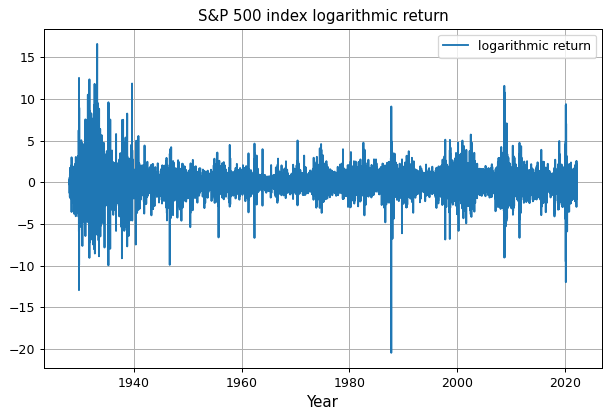

In [5]:
plt.figure(figsize=(8,5),dpi=90)
plt.grid()
plt.plot(df['return'],label='logarithmic return')
plt.xlabel('Year',{'fontsize':'large'})
plt.title('S&P 500 index logarithmic return')
plt.legend()
plt.show()

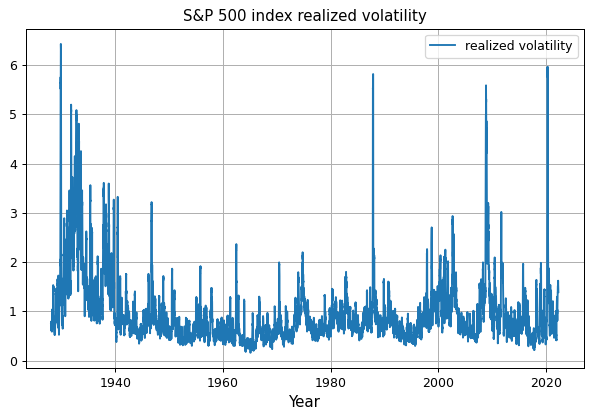

In [6]:
plt.figure(figsize=(8,5), dpi=90)
plt.grid()
plt.plot(df['realized volatility'],label='realized volatility')
plt.xlabel('Year',{'fontsize':'large'})
plt.title('S&P 500 index realized volatility')
plt.legend()

/Users/shinachuan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


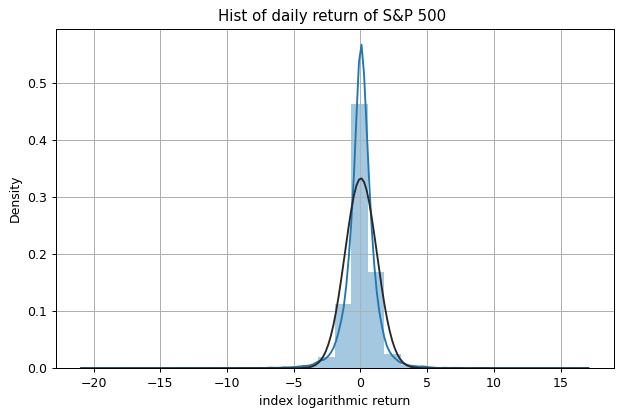

In [9]:
plt.figure(figsize=(8,5), dpi=90)
sns.distplot(df['return'], norm_hist=True, fit=stats.norm, 
             bins=30)
plt.xlabel('index logarithmic return')
plt.title('Hist of daily return of S&P 500 ')
plt.grid()
plt.show()

In [10]:
# x_dim: the dimension of the input X
# time_steps: predict of n days
# if x_dim = 22, time steps = 1, it means we use X1 = [p1,p2,...,p22] to predict p23(y1)

def create_dataset(x, y, x_dim, time_steps):
    dataX, dataY = [], []
    for i in range(len(x) - x_dim - time_steps + 1):
        dataX.append(x[i:(i + x_dim), 0])
        dataY.append(y[i + x_dim + time_steps-1, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
vol=np.array(df['realized volatility']).reshape(-1,1)
vol_scaler = MinMaxScaler(feature_range=(0,1))
vol=vol_scaler.fit_transform(vol)

ret=np.array(df['return']).reshape(-1,1)
ret_scaler = MinMaxScaler(feature_range=(0,1))
ret=ret_scaler.fit_transform(ret)

vol.shape, ret.shape

((23656, 1), (23656, 1))

In [12]:
ratio = 0.8
Traindata_x = ret[0:round(len(ret)*ratio)]
Traindata_y = vol[0:round(len(vol)*ratio)]

Testdata_x = ret[round(len(ret)*ratio):]
Testdata_y = vol[round(len(vol)*ratio):]

Traindata_x.shape, Testdata_x.shape, Traindata_x.shape, Traindata_y.shape

((18925, 1), (4731, 1), (18925, 1), (18925, 1))

In [13]:
from sklearn.model_selection import train_test_split
time_steps = 1
x_dim = 22
X, y = create_dataset(Traindata_x, Traindata_y, x_dim, time_steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
print('Data size: {} Train size: {} Test size: {}'.format(X.shape[0], X_train.shape[0], X_test.shape[0]))

Data size: 18903 Train size: 17012 Test size: 1891


In [121]:
train_size = 0.9
index = np.random.choice(len(X),int(len(X)*train_size),replace=False)
X_train = X[index]
X_test = np.delete(X, index, 0)
y_train = y[index]
y_test = np.delete(y, index, 0)
print('Data size: {} Train size: {} Test size: {}'.format(X.shape[0], X_train.shape[0], X_test.shape[0]))

Data size: 18903 Train size: 17012 Test size: 1891


In [125]:
rt = Traindata_x[x_dim+time_steps-1:]
rt_train = rt[index]
rt_test = np.delete(rt, index, 0)
print('RT Data size: {} RT Train size: {} RT Test size: {}'.format(rt.shape[0], rt_train.shape[0], rt_test.shape[0]))

RT Data size: 18903 RT Train size: 17012 RT Test size: 1891


In [14]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_train.shape[1],1))
print('------------------------------------------------------')
print('X_train shape: {}'.format(X_train.shape))
print('------------------------------------------------------')
print('X_test shape: {}'.format(X_test.shape))

------------------------------------------------------
X_train shape: (17012, 22, 1)
------------------------------------------------------
X_test shape: (1891, 22, 1)


In [35]:
from keras.layers import Input, LSTM, Dense
from keras.models import Model
import keras.backend as K

In [141]:
def custom_loss(y_true, y_pred, rt):
    loss_true = 2*K.log(y_true)+K.square(rt)/K.square(y_true)
    loss_pred = 2*K.log(y_pred)+K.square(rt)/K.square(y_pred)
    return K.square(loss_true-loss_pred)

In [142]:
input = Input(shape=(x_dim, 1), name='main_input')
lstm = LSTM(16, return_sequences=False)(input)
output = Dense(1)(lstm)
target = Input(1)
rt = Input(1)
model = Model([input,target,rt], output)
model.add_loss(custom_loss(target, input, rt))
model.compile(loss=None, optimizer='adam',metrics=['mse','mae', 'mape','msle'])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_input (InputLayer)        [(None, 22, 1)]      0           []                               
                                                                                                  
 lstm_9 (LSTM)                  (None, 16)           1152        ['main_input[0][0]']             
                                                                                                  
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 1)]          0           []                               
                                                                                            

In [140]:
history = model.fit(x=[X_train, y_train, rt_train],y=None, epochs=300, batch_size=64, verbose=1, validation_split=2/9)

Epoch 1/300


ValueError: in user code:

    File "/Users/shinachuan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/shinachuan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/shinachuan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/shinachuan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 863, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/shinachuan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py", line 532, in minimize
        return self.apply_gradients(grads_and_vars, name=name)
    File "/Users/shinachuan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py", line 633, in apply_gradients
        grads_and_vars = optimizer_utils.filter_empty_gradients(grads_and_vars)
    File "/Users/shinachuan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizer_v2/utils.py", line 73, in filter_empty_gradients
        raise ValueError(f"No gradients provided for any variable: {variable}. "

    ValueError: No gradients provided for any variable: (['lstm_8/lstm_cell_8/kernel:0', 'lstm_8/lstm_cell_8/recurrent_kernel:0', 'lstm_8/lstm_cell_8/bias:0', 'dense_8/kernel:0', 'dense_8/bias:0'],). Provided `grads_and_vars` is ((None, <tf.Variable 'lstm_8/lstm_cell_8/kernel:0' shape=(1, 64) dtype=float32>), (None, <tf.Variable 'lstm_8/lstm_cell_8/recurrent_kernel:0' shape=(16, 64) dtype=float32>), (None, <tf.Variable 'lstm_8/lstm_cell_8/bias:0' shape=(64,) dtype=float32>), (None, <tf.Variable 'dense_8/kernel:0' shape=(16, 1) dtype=float32>), (None, <tf.Variable 'dense_8/bias:0' shape=(1,) dtype=float32>)).


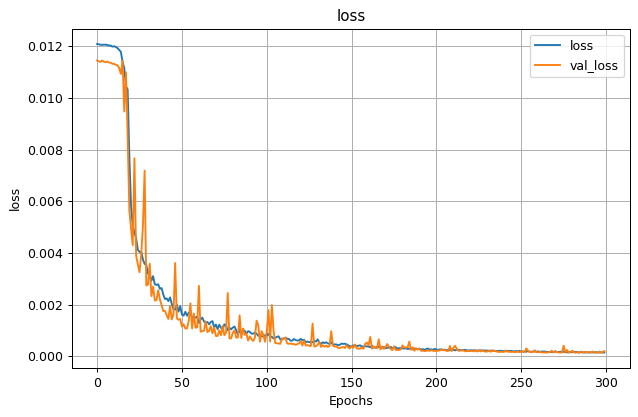

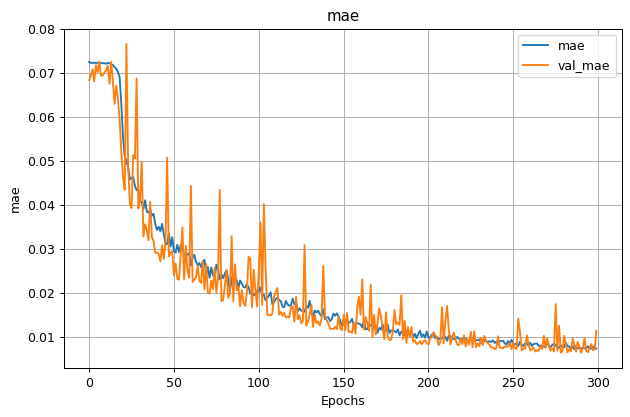

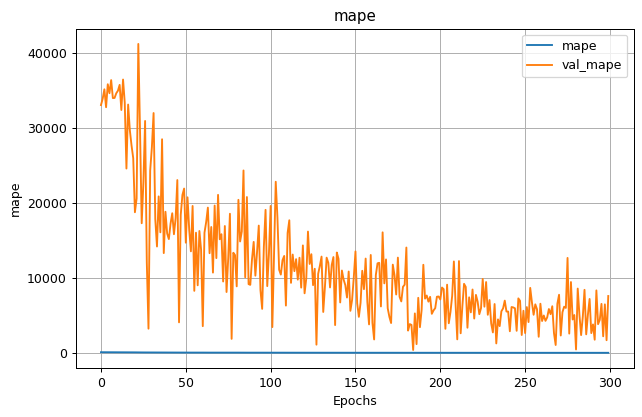

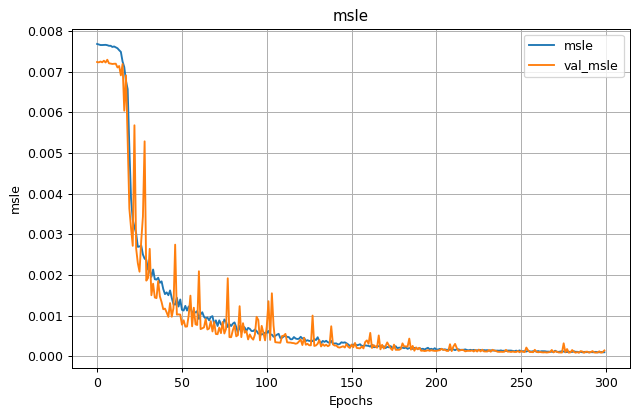

In [29]:
def visualize_loss(history, evaluation):
    train = history.history[evaluation]
    val = history.history['val_'+evaluation]
    epochs = range(len(train))
    plt.figure(figsize=(8,5),dpi=90)
    plt.plot(epochs, train, label=evaluation)
    plt.plot(epochs, val, label='val_'+evaluation)
    plt.title(evaluation)
    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel(evaluation)
    plt.legend()
    plt.show()

for eva in ['loss','mae', 'mape','msle']:
    visualize_loss(history, eva)

In [37]:
Test_X, Test_y = create_dataset(Testdata_x, Testdata_y, x_dim, time_steps)
Train_X, Train_y = create_dataset(Traindata_x, Traindata_y, x_dim, time_steps)

In [38]:
Test_y_pre = model.predict(Test_X.reshape(Test_X.shape[0], Test_X.shape[1], 1))
Test_y_pre = vol_scaler.inverse_transform(Test_y_pre)
Test_y = vol_scaler.inverse_transform(Test_y.reshape(-1,1))

Train_y_pre = model.predict(Train_X.reshape(Train_X.shape[0], Train_X.shape[1], 1))
Train_y_pre = vol_scaler.inverse_transform(Train_y_pre)
Train_y = vol_scaler.inverse_transform(Train_y.reshape(-1,1))

In [39]:
index_train = df.index[x_dim+time_steps-1:round(len(vol)*ratio)]
index_test = df.index[round(len(vol)*ratio)+x_dim+time_steps-1:]

Test_y = pd.Series(Test_y.reshape(-1,), index=index_test)
Test_y_pre = pd.Series(Test_y_pre.reshape(-1,), index=index_test)

In [40]:
Train_y = pd.Series(Train_y.reshape(-1,), index=index_train)
Train_y_pre = pd.Series(Train_y_pre.reshape(-1,), index=index_train)

In [41]:
plt.figure(figsize=(8,5),dpi=90)

plt.grid()
plt.plot(Train_y,label='volatility train')
plt.plot(Test_y, label='volatility test')
plt.plot(Test_y_pre,label='volatility test predict')
plt.title('LSTM Predict')
plt.legend()

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000001C5891E8AF0>
Traceback (most recent call last):
  File "D:\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\transforms.py", line 222, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


Error in callback <function flush_figures at 0x000001C50FBA9820> (for post_execute):


KeyboardInterrupt: 

In [43]:
from sklearn import metrics
mse = metrics.mean_squared_error(Test_y, Test_y_pre)
mae = metrics.mean_absolute_error(Test_y, Test_y_pre)
r2 = metrics.r2_score(Test_y, Test_y_pre)
print('r2: {:.4f}%'.format(r2*100))
print('mean squared error: {:.4f}%'.format(mse*100))
print('mean absolute error: {:.4f}%'.format(mae*100))

r2: 98.6896%
mean squared error: 0.6579%
mean absolute error: 6.7831%
